In [0]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [0]:
url="https://raw.githubusercontent.com/maitri23/Stock-Market-Prediction/master/train.csv"
df=pd.read_csv(url)
training_set = df.iloc[:, 1:2].values


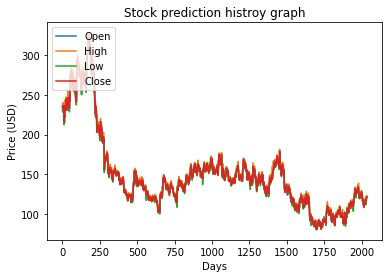

In [0]:
plt.figure()
plt.plot(df['Open'])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('Stock prediction histroy graph')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()


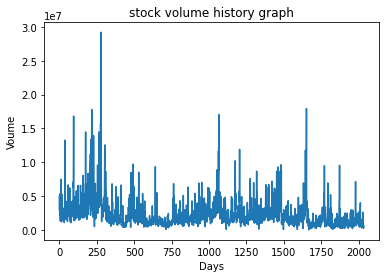

In [0]:
plt.figure()
plt.plot(df["Total Trade Quantity"])
plt.title('stock volume history graph')
plt.ylabel('Voume')
plt.xlabel('Days')
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 2032):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1972/1972 [==============================] - 10s 5ms/step - loss: 0.0096
Epoch 2/100
1972/1972 [==============================] - 8s 4ms/step - loss: 0.0031
Epoch 3/100
1972/1972 [==============================] - 9s 4ms/step - loss: 0.0026
Epoch 4/100
1972/1972 [==============================] - 9s 4ms/step - loss: 0.0027
Epoch 5/100
1972/1972 [==============================] - 9s 4ms/step - loss: 0.0023
Epoch 6/100
1972/1972 [==============================] - 9s 4ms/step - loss: 0.0024
Epoch 7/100
1972/1972 [==============================] - 9s 4ms/step - loss: 0.0022
Epoch 8/100
1972/1972 [==============================] - 9s 4ms/step - loss: 0.0023
Epoch 9/100
1972/1972 [==============================] - 9s 4ms/step - loss: 0.0021
Epoch 10/100
1972/1972 [==============================] - 9s 4ms/step - loss: 0.0020
Epoch 11/100
1972/1972 [==============================] - 8s 4ms/step - loss: 0.0018
Epoch 12/100
1972/1972 [==============================] - 9s 4ms/step - l

In [0]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/maitri23/Stock-Market-Prediction/master/test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

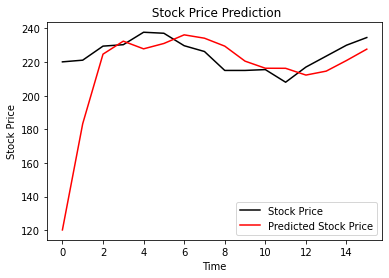

In [0]:
plt.plot(real_stock_price, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [2]:
print("by: Abhinav,Maitri")

by: Abhinav,Maitri
